**IMPORT LIBARIRIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

**READ DATA**

In [2]:
train_data=pd.read_csv(r'/kaggle/input/playground-series-s4e10/train.csv')
test_data=pd.read_csv(r'/kaggle/input/playground-series-s4e10/test.csv')


In [3]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
train_data.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
train_data=train_data.drop('id',axis=1)

**VISUALIZATION**

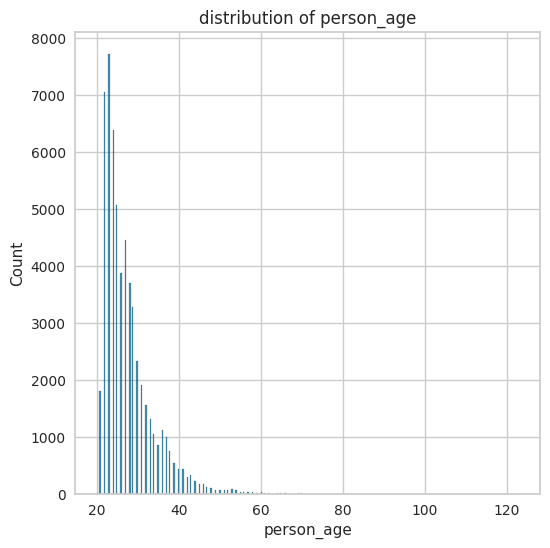

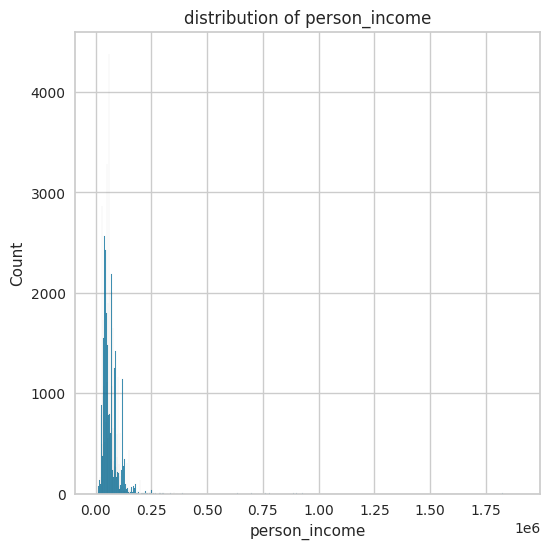

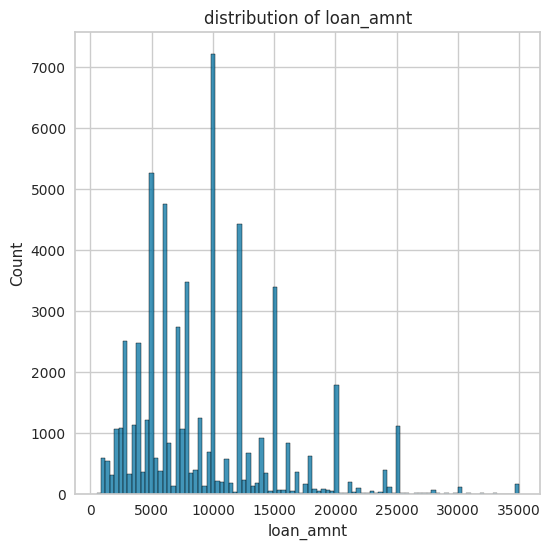

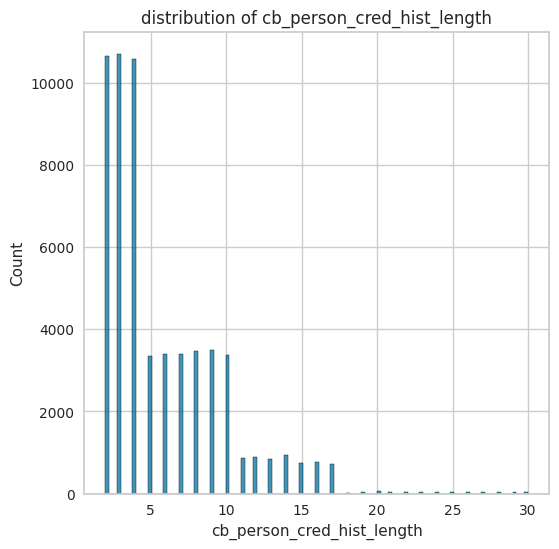

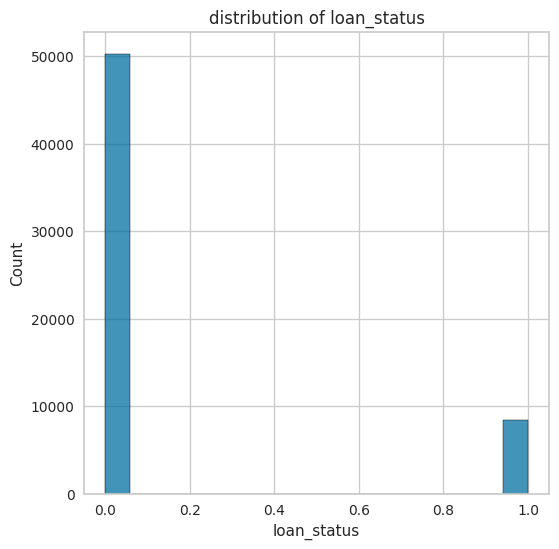

In [7]:
for cols in train_data.select_dtypes(include='int64').columns:
    plt.figure(figsize=(6,6))
    sns.histplot(data=train_data,x=cols)
    plt.title(f"distribution of {cols}")
    plt.show()

In [8]:
train_data.select_dtypes('object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
58640,MORTGAGE,EDUCATION,D,Y
58641,RENT,MEDICAL,C,N
58642,RENT,EDUCATION,D,N
58643,RENT,EDUCATION,A,N


**DATA PREPROCESSING**

In [9]:
x=train_data.drop('loan_status',axis=1)
y=train_data['loan_status']

In [10]:
le=LabelEncoder()
for col in x.select_dtypes('object').columns:
    x[col]=le.fit_transform(x[col])

**SPLITTING DATA**

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**TRAINING ALL MODELS**

In [12]:
models = {
    'Linear_Regression':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'Random Forest': RandomForestClassifier(),
    'XGB':XGBRegressor(),
    'SVM':SVC()
}

In [13]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

 
    accuracy = accuracy_score(y_test, obj_pred>0.5)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')

  
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)


print(results_df)

               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.889249   0.881539  0.889249  0.864612
1                KNN  0.893597   0.885885  0.893597  0.888510
2       DecisionTree  0.912610   0.914018  0.912610  0.913274
3      Random Forest  0.949783   0.948664  0.949783  0.946901
4                XGB  0.952767   0.951642  0.952767  0.950415
5                SVM  0.860005   0.739609  0.860005  0.795276


In [14]:
model =RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Classification Report :" , classification_report(y_pred,y_test))

Classification Report :               precision    recall  f1-score   support

           0       0.99      0.95      0.97     10480
           1       0.70      0.92      0.79      1249

    accuracy                           0.95     11729
   macro avg       0.84      0.93      0.88     11729
weighted avg       0.96      0.95      0.95     11729



**TESTING RF MODEL**

In [15]:
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [17]:
test_data.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [18]:
for col in test_data.select_dtypes('object').columns:
    test_data[col]=le.fit_transform(test_data[col])

In [19]:
x_test=test_data.drop("id",axis=1)

In [20]:
test_predictions = model.predict(x_test)

test_pred_proba = model.predict_proba(x_test)[:, 1]

In [21]:
print(test_pred_proba)

[0.96 0.01 0.65 ... 0.01 0.32 0.97]


In [22]:
submission=pd.read_csv(r'/kaggle/input/playground-series-s4e10/sample_submission.csv')
submission.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [23]:
submission['loan_status'] = test_pred_proba

**SAVE FILE**

In [24]:
submission.to_csv('submission.csv', index=False)

In [25]:
submission

,id,loan_status
0,58645,0.96
1,58646,0.01
2,58647,0.65
3,58648,0.04
4,58649,0.08
...,...,...
39093,97738,0.03
39094,97739,0.00
39095,97740,0.01
39096,97741,0.32
